In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt

In [3]:
#     b. Load the training and testing data (MNIST)
mnist= tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
#normalize
x_train=x_train/255
x_test=x_test/255

In [5]:
#     c. Define the network architecture using Keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')


])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
#     d. Train the model using SGD
model.compile(optimizer='sgd',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])


history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6588 - accuracy: 0.8349 - val_loss: 0.3599 - val_accuracy: 0.9038
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.9051 - val_loss: 0.2975 - val_accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.9183 - val_loss: 0.2639 - val_accuracy: 0.9266
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2600 - accuracy: 0.9268 - val_loss: 0.2395 - val_accuracy: 0.9323
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2371 - accuracy: 0.9333 - val_loss: 0.2235 - val_accuracy: 0.9373
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2182 - accuracy: 0.9388 - val_loss: 0.2083 - val_accuracy: 0.9429
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2020 - accuracy: 0.9435 - val_loss: 0.1946 - val_accuracy:

In [7]:
#   _  e. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1624 - accuracy: 0.9543
Loss=0.162
Accuracy=0.954


<function matplotlib.pyplot.show(close=None, block=None)>

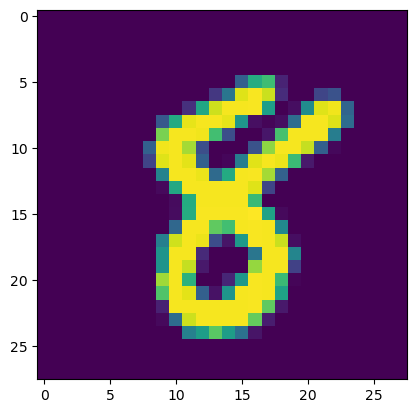

In [8]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [9]:
predicted_value= model.predict(x_test)
print("Handwritten is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 1ms/step
Handwritten is= 8


In [10]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

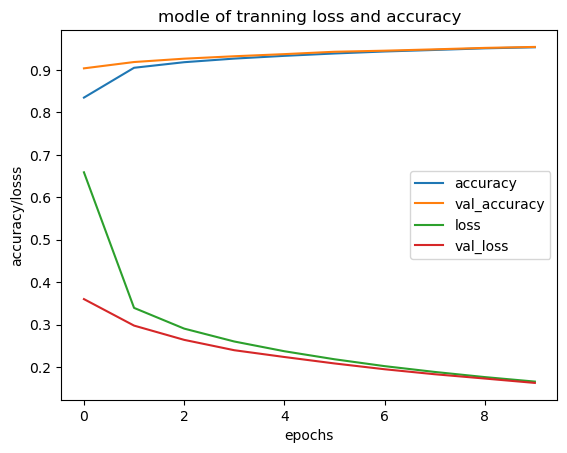

In [11]:
#     f. Plot the training loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modle of tranning loss and accuracy')
plt.ylabel('accuracy/losss')
plt.xlabel('epochs')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()